### LAB<sup>9-2</sup> 합성곱 신경망으로 패션 MNIST 분류를 개선하기 (p.336)

**실습 목표**

CNN을 이용하여 패션 MNIST 데이터를 분류하는 작업을 시도하자. 이 방법과 다층 퍼셉트론을 사용한 방법을 비교하고, 얼마나 성능이 개선되는지 확인해 보자.

#### 1. 패키지를 임포트하고 데이터를 준비하는 작업은 LAB<sup>8-1</sup>과 동일하다,

In [1]:
# tensorflow와 tf.keras를 임포트한다.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터를 학습용 데이터, 테스트 데이터로 구분
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### 2. 덷이터 읽기가 끝나면 훈련 데이터와 정답 레이블, 테스트 데이터의 모양을 살펴보자. 입력 데이터는 (데이터 인스턴스의 수, 데이터 행의 수, 데이터 열의 수) 형태로 되어 있음을 확인할 수 있다. 레이블은 각 인스턴스마다 속하는 클래스가 0에서 9까지의 수로 표시되어 있다.

In [2]:
print(train_images.shape) # 학습 이미지의 형태와 레이블을 출력한다
print(train_labels)
print(test_images.shape)

(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


#### 3. 그런데 합성곱 신경망은 (데이터 인스턴스의 수, 데이터의 행 수, 데이터의 열 수, 채널 수)의 형태로 제공되어야 한다. 우리가 가진 패션 MNIST 데이터는 채널 정보가 없다. 이것은 하나의 채널로 이루어진 회색조 이미지이기 때문이다. 따라서 채널의 수를 1로 하여 (데이터 인스턴스의 수, 데이터의 행 수, 데이터의 열 수, 1)로 변형하면 된다. 이것은 넘파이의 newaxis를 활용하면 된다.

In [3]:
train_images = train_images[:, :, :, np.newaxis]
test_images  = test_images[:, :, :, np.newaxis]

#### 4. 모델을 만들어보자. 아래 그림과 같은 구성을 설계하였다면 이를 그대로 옮겨서 케라스의 Sequential 클래스에 계층을 쌓으면 된다.

In [4]:
# model = keras.models.Sequential([
#     keras.layers.Conv2D(input_shape=(28,28,1),
#                         kernel_size=(3,3), padding='same',
#                         filters=32),
#     keras.layers.MaxPooling2D((2,2), strides=2),
#     keras.layers.Conv2D(kernel_size=(3,3), padding='same',
#                         filters=64),
#     keras.layers.MaxPooling2D((2,2), strides=2),
#     keras.layers.Conv2D(kernel_size=(3,3), padding='same',
#                         filters=32),
#     keras.layers.Flatten(),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

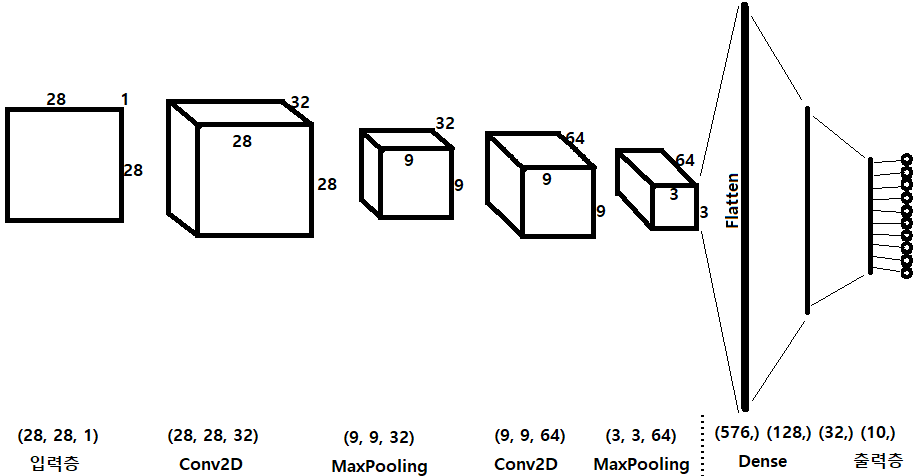

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1),
                        kernel_size=(2,2), padding='same',
                        filters=32),
    keras.layers.MaxPooling2D((2,2), strides=3),
    keras.layers.Conv2D(kernel_size=(3,3), padding='same',
                        filters=64),
    keras.layers.MaxPooling2D((2,2), strides=3),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#### 5. 모델의 요약 정보를 확인하여 출력이 설계와 동일하게 만들어지는지 확인해 보고, 전체 파라미터가 어떻게 구성되는지도 확인한다. 

학습의 대상이 되는 파라미터의 수가 총 242,570 개임을 확일할 수 있다.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               73856     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4

#### 6. 모델을 컴파일한 후 학습을 실시하는 과정의 손실 값과 정확도는 history에 기록된다. 이 때 15 에폭을 사용하고, 훈련 과정에서 75%의 데이터는 학습에 사용하고, 25%는 검증에 사용하는 교차검증 기법으로 훈련한다. 다층 퍼셉트론에 비해 정확도가 크게 개선된다.

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels,
                    epochs=15, validation_split=0.25)

Epoch 1/15
1407/1407 [==============================] - 14s 10ms/step - loss: 0.7785 - accuracy: 0.7898 - val_loss: 0.4816 - val_accuracy: 0.8296
Epoch 2/15
1407/1407 [==============================] - 14s 10ms/step - loss: 0.4070 - accuracy: 0.8541 - val_loss: 0.5373 - val_accuracy: 0.8201
Epoch 3/15
1407/1407 [==============================] - 14s 10ms/step - loss: 0.3485 - accuracy: 0.8748 - val_loss: 0.3409 - val_accuracy: 0.8793
Epoch 4/15
1407/1407 [==============================] - 15s 11ms/step - loss: 0.3166 - accuracy: 0.8853 - val_loss: 0.3278 - val_accuracy: 0.8853
Epoch 5/15
1407/1407 [==============================] - 14s 10ms/step - loss: 0.2890 - accuracy: 0.8950 - val_loss: 0.3456 - val_accuracy: 0.8779
Epoch 6/15
1407/1407 [==============================] - 14s 10ms/step - loss: 0.2706 - accuracy: 0.9012 - val_loss: 0.3313 - val_accuracy: 0.8826
Epoch 7/15
1407/1407 [==============================] - 14s 10ms/step - loss: 0.2536 - accuracy: 0.9067 - val_loss: 0.3096 -

#### 7. 훈련 과정에서 기록된 손실과 정확도를 그려보자. 파란색은 훈련용 데이터에 대한 손실과 정확도, 붉은색 점선은 교차검증용 데이터에 대한 손실과 정확도이다.

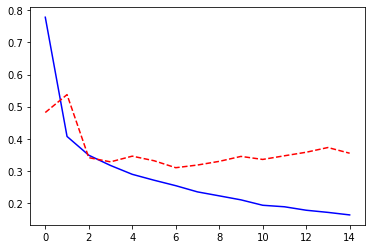

In [8]:
plt.plot(history.history['loss'], 'b-')
plt.plot(history.history['val_loss'], 'r--')

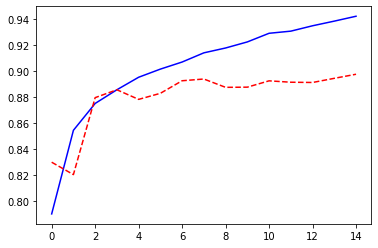

In [9]:
plt.plot(history.history['accuracy'], 'b-')
plt.plot(history.history['val_accuracy'], 'r--')

#### 8. 훈련 과정에서 본 적이 없는 새로운 데이터를 이용하여 모델의 학습 결과를 테스트하도록 하자. 90% 수준의 정확도를 보이고 있다. 이것은 다층 퍼셉트론을 사용했던 실습에 비해 2% 포인트의 향상을 나타낸다.

In [10]:
test_loss = test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3922 - accuracy: 0.8921
테스트 정확도: [0.3922494649887085, 0.8920999765396118]


#### 9. 클래스를 나타내는 정수를 문자열로 바꾸기 위한 문자열의 리스트를 만들어 둔다.

In [11]:
class_name = ['T-shirt/top', 'Trouser', 'Pullouver', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### 10. 난수를 하나 발생시켜 이 난수를 인덱스로 사용하여 얻을 수 있는 테스트 이미지부터 시작하여 25개의 데이터를 얻은 뒤에, 이 데이터를 모델에 제공하여 예측을 하게 해 보자. 다음과 같이 25개의 예측 레이블을 생성할 것이다.

In [12]:
randIdx = np.random.randint(0, 1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
print(predictions)

[4 4 6 7 7 8 9 0 6 8 7 6 7 9 3 4 6 6 5 0 1 1 5 9 4]


#### 11. 어떤 이미지인지 알 수가 없고 레이블의 숫자만 가지고는 제대로 분류를 했는지 알 수 없으므로 5장 미니프로젝트 A1에서 사용했던 plot_images()를 사용해 보자. 이번에는 회색조 색상으로 출력하게 imshow() 함수에 cmap 키워드 파라미터에 'gray'를 지정했다.

In [13]:
def plot_images(images, labels, images_per_row=5):
  n_images = len(images)
  n_rows = (n_images-1) // images_per_row + 1
  fig, ax = plt.subplots(n_rows, images_per_row,
                         figsize=(images_per_row * 2, n_rows * 2))
  for i in range(n_rows):
    for j in range(images_per_row):
      if i*images_per_row + j >= n_images: break
      img_idx = i*images_per_row + j
      a_image = images[img_idx].reshape(28,28)
      if n_rows>1: axis = ax[i, j]
      else: axis = ax[j]
      axis.get_xaxis().set_visible(False)
      axis.get_yaxis().set_visible(False)
      label = class_name[labels[img_idx]]
      axis.set_title(label)
      axis.imshow(a_image, cmap='gray', interpolation='nearest')

#### 12. 이미지와 예측 결과를 넘겨주면 모델의 예측 능력을 눈으로 확인할 수 있다.

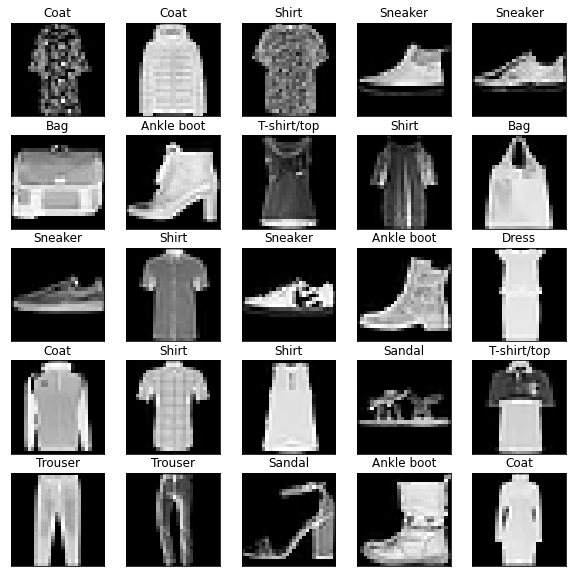

In [14]:
plot_images(images, predictions, images_per_row=5)

#### 13. 난수 발생과 예측하기를 반복하면 다양한 검증 데이터를 사용하여 예측 결과를 확인할 수 있다. 그리고 상당히 높은 정확도로 이미지를 분류하는 것을 보게 될 것이다.

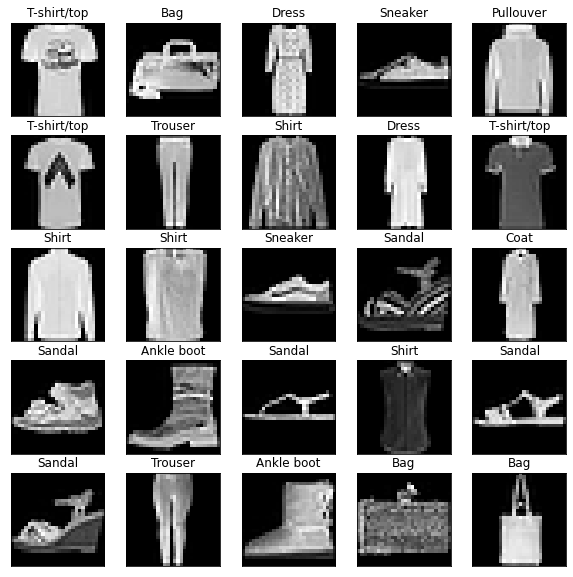

In [15]:
randIdx = np.random.randint(0, 1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
plot_images(images, predictions, images_per_row=5)